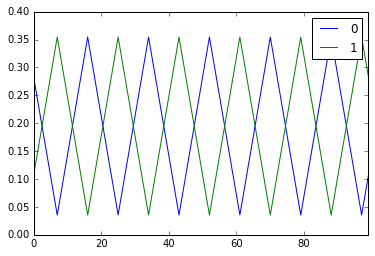

In [30]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd  
from random import random

flow = (list(range(1,10,1)) + list(range(10,1,-1)))*1000  
pdata = pd.DataFrame({"a":flow, "b":flow})  
pdata.b = pdata.b.shift(9)  
data = pdata.iloc[10:] * random()  # some noise  

import numpy as np

def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])

    return (X_train, y_train), (X_test, y_test)

ntrn = int(round(len(data) * (1 - 0.1)))
X_train, y_train = _load_data(data.iloc[0:ntrn])

pd.DataFrame(X_train[1,:,:]).plot()

In [ ]:
http://stackoverflow.com/questions/34790159/stacked-rnn-model-setup-in-tensorflow

In [ ]:
self._input = tf.placeholder(tf.float32, [self.batch_size, self.max_seq_length, self.vocab_dim], name='input')
self._target = tf.placeholder(tf.float32, [self.batch_size, 2], name='target')

lstm_cell = rnn_cell.BasicLSTMCell(self.vocab_dim, forget_bias=1.)
lstm_cell = rnn_cell.DropoutWrapper(lstm_cell, output_keep_prob=self.dropout_ratio)
self.cells = rnn_cell.MultiRNNCell([lstm_cell] * self.num_layers)
self._initial_state = self.cells.zero_state(self.batch_size, tf.float32)

inputs = tf.nn.dropout(self._input, self.dropout_ratio)
inputs = [tf.reshape(input_, (self.batch_size, self.vocab_dim)) for input_ in
              tf.split(1, self.max_seq_length, inputs)]

outputs, states = rnn.rnn(self.cells, inputs, initial_state=self._initial_state)

# We only care about the output of the last RNN cell...
y_pred = tf.nn.xw_plus_b(outputs[-1], tf.get_variable("softmax_w", [self.vocab_dim, 2]), tf.get_variable("softmax_b", [2]))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_pred, self._target))
correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(self._target, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

train_op = tf.train.AdamOptimizer(self.lr).minimize(loss)

init = tf.initialize_all_variables()

with tf.Session() as sess:
        initializer = tf.random_uniform_initializer(-0.04, 0.04)
        with tf.variable_scope("model", reuse=True, initializer=initializer):
            sess.run(init)
            # generate batches here (omitted for clarity)
            print sess.run([train_op, loss, accuracy], feed_dict={self._input: batch_x, self._target: batch_y})

In [ ]:
tensorflow rnn unit test

In [ ]:
    num_units = 3
    input_size = 5
    batch_size = 2
    max_length = 8
    with self.test_session(use_gpu=use_gpu, graph=tf.Graph()) as sess:
      initializer = tf.random_uniform_initializer(-0.01, 0.01, seed=self._seed)
      cell = tf.nn.rnn_cell.LSTMCell(
          num_units, input_size, initializer=initializer)
      inputs = max_length * [
          tf.placeholder(tf.float32, shape=(batch_size, input_size))]
      outputs, _ = tf.nn.rnn(cell, inputs, dtype=tf.float32)
      self.assertEqual(len(outputs), len(inputs))
      for out in outputs:
        self.assertEqual(out.get_shape().as_list(), [batch_size, num_units])

      tf.initialize_all_variables().run()
      input_value = np.random.randn(batch_size, input_size)
      sess.run(outputs, feed_dict={inputs[0]: input_value})

In [10]:


import tensorflow as tf
from tensorflow.python.ops import rnn_cell

init_scale = 0.1
num_steps = 7
num_units = 7
input_data = [1, 2, 3, 4, 5, 6, 7]
target = [2, 3, 4, 5, 6, 7, 7]

batch_size = 1

with tf.Graph().as_default(), tf.Session() as session:
  


    
    
    
    

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_1' with dtype int32 and shape [1,1]
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_INT32, shape=[1,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
Caused by op u'Placeholder_1', defined at:
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-a84611cfd007>", line 18, in <module>
    inputs = [tf.placeholder(tf.int32, [batch_size, 1]) for _ in xrange(num_steps)]
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 742, in placeholder
    name=name)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 583, in _placeholder
    name=name)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/op_def_library.py", line 655, in apply_op
    op_def=op_def)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2040, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/ryanwheeler/.conda/envs/py27/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1087, in __init__
    self._traceback = _extract_stack()
